# User's Guide, Chapter 32: Articulations

Articulations are elements attached usually to Notes that specify how the note should be played.  In `music21` we use the term articulation also to refer to indications that are specific to instruments, such as bowing or fingering information.  They all live in the :ref:`moduleArticulations` module and start with the class :class:`~music21.articulations.Articulation`.

In [1]:
art = articulations.Articulation()
art

<music21.articulations.Articulation>

All articulations have a `.placement` attribute which can be 'above', 'below', or None.

In [2]:
print(art.placement)

None


In [3]:
art.placement = 'above'
art.placement

'above'

All articulations have additional `.style` information, which we will discuss in more depth later:

In [4]:
art.style.absoluteX = 20

Now, most of the time you won't want _any_ articulation, you will want _the_ specific articulation such as `Staccato`, `Accent`, etc.  So there are classes for each of them:

In [5]:
stac = articulations.Staccato()
acc = articulations.Accent()

To make an articulation display, attach it to the `.articulations` list on a Note:

In [6]:
n1 = note.Note('A4')
n1.articulations

[]

In [7]:
n1.articulations.append(stac)
n1.articulations

[<music21.articulations.Staccato>]

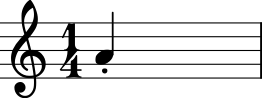

In [8]:
n1.show()

Because `.articulations` is a list, a note may have multiple articulations:

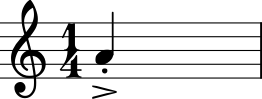

In [9]:
n1.articulations.append(acc)
n1.show()

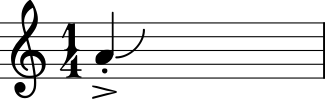

In [10]:
doit = articulations.Doit()
n1.articulations.append(doit)
n1.show()

Some articulations affect the length of the note:

In [11]:
stac.lengthShift

0.7

Others affect the volume:

In [12]:
acc.volumeShift

0.1

Many articulations have additional parameters.  :class:`~music21.articulations.StrongAccent` for instance can point up or down:

In [13]:
sacc = articulations.StrongAccent()
sacc.pointDirection

'up'

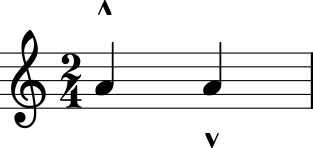

In [14]:
sacc.placement = 'above'

n2 = note.Note('A4')
n2.articulations.append(sacc)

sacc2 = articulations.StrongAccent()
sacc2.pointDirection = 'down'
sacc2.placement = 'above'

n3 = note.Note('A4')
n3.articulations.append(sacc2)

m = stream.Measure()
m.append([n2, n3])
m.show()

Unfortunately, MuseScore does not respect `.placement` if pointDirection is specified.

As we saw in :ref:`Chapter 13<usersGuide_13_music21object2>`, when a note is split, its articulations go either on the first note of the split, the last, or all the notes:

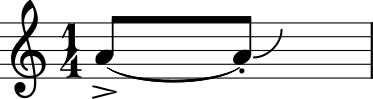

In [15]:
n12, n22 = n1.splitAtQuarterLength(0.5)
m2 = stream.Measure()
m2.append([n12, n22])
m2.show()

This property is determined by the `.tieAttach` value for an articulation:

In [16]:
acc.tieAttach, stac.tieAttach

('first', 'last')

Breath marks can have a `.symbol` of 'comma' or 'tick':

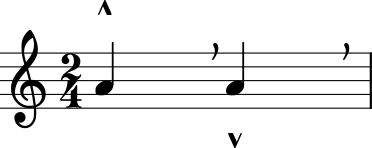

In [17]:
bm2 = articulations.BreathMark()
bm2.symbol = 'comma'
n2.articulations.append(bm2)

bm3 = articulations.BreathMark()
bm3.symbol = 'tick'
n3.articulations.append(bm3)

m.show()

Again, unfortunately, some MusicXML readers do not respect this value.

MusicXML distinguishes articulations from technical indicates, but in `music21` these are all in the `articulations` module and stored in the `.articulations` list.  They do, however, have `TechnicalIndication` in their classes: 

In [18]:
f = articulations.Fingering(5)
f.classes

('Fingering',
 'TechnicalIndication',
 'Articulation',
 'Music21Object',
 'ProtoM21Object',
 'object')

In [19]:
f.fingerNumber

5

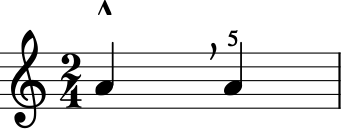

In [20]:
n3.articulations = []
n3.articulations.append(f)
m.show()

`Music21` can represent all the information in MusicXML articulations, and every MusicXML technical indication with the exception of guitar information, arrows, and woodwind/brass fingering.

This is a short chapter, because once you know a bit about articulations, you'll just want to spend your time in the :ref:`moduleArticulations` module reference to learn more about them.  But there is a related concept called "expressions" that we will learn about in :ref:`Chapter 33: Expressions and Ornaments<usersGuide_33_expressions>`